In [35]:
from konlpy.tag import Hannanum
from konlpy.tag import Twitter 
from konlpy.tag  import Kkma

hannanum =Hannanum()
twitter =Twitter()
kkma = Kkma()

C:\Users\hongm\anaconda3\envs\ck\lib\site-packages\konlpy\tag\_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


In [42]:
# 인코딩된 파일 읽어드릴때(TXT 파일 read 오류 발생) ,
# 에러 발생시에 f = open('test.txt', 'rt' , encoding = 'UTF8') 에러 해결.

#형태소분석 - kkma명사
line_list = []
f =open("C:/Users/hongm/Downloads/centrum_review.txt", "rt", encoding ="UTF8")

for line in f:
    line = kkma.nouns(line)
    line_list.append(line)
f.close()
    
    
print("-불러온 문서:", len(line_list), "문장")

-불러온 문서: 102 문장


In [43]:
line_list[10]

['플라스틱', '포장', '과대', '과대포장', '상품', '상품자체', '자체', '투명']

In [45]:
word_frequency = {}
noun_list =[]
#불용어 리스트 추가
stop_list = ["배송", "만족"]
line_number = 0
for line in line_list[:]:
    line_number += 1
    print(str(line_number) + "/" + str(len(line_list)), end="\r")
    noun = []
    for word in line:
        if word.split("/")[0] not in stop_list and len(word.split("/")[0]) > 1:  
            noun.append(word.split("/")[0])
            if word not in word_frequency.keys():
                word_frequency[word] = 1
            else:
                word_frequency[word] += 1
    noun_list.extend(noun)

In [66]:
#단어별 출현빈도 출력
word_count = []
for n, freq in word_frequency.items():
    word_count.append([n, freq])
word_count.sort(key=lambda elem: elem[1], reverse=True)
for n, freq in word_count[:10]:
    print(n + "\t" + str(freq))

감사	9
구매	7
비타민	7
추천	5
건강	4
가격	4
번째	3
적극	3
피곤	3
이용	3


In [67]:
#추출한 명사 리스트를 활용해 명사만으로 이루어진 문서를 생성
noun_doc = ' '.join(noun_list)
noun_doc = noun_doc.strip()

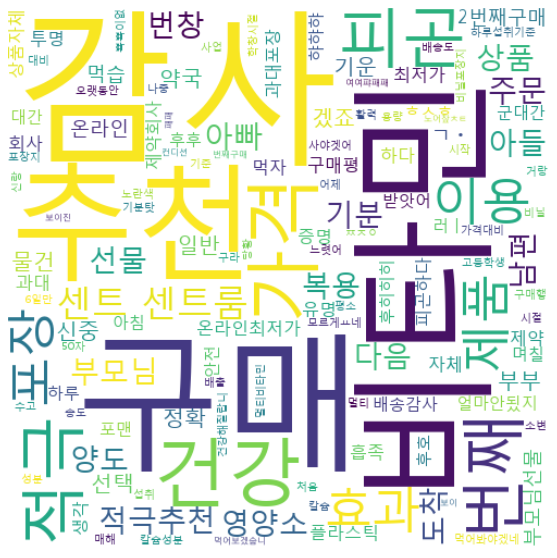

In [75]:
# 워드클라우드 파라미터 설정
#폰트 설정 주의! 

font_path="G:/workpy/zoom/malgun.ttf"  #폰트
background_color="white"      #배경색
margin=3                     #모서리 여백 넓이
min_font_size=7              #최소 글자 크기
max_font_size=150             #최대 글자 크기
width=500                     #이미지 가로 크기
height=500                    #이미지 세로 크기
wc = WordCloud(font_path=font_path, background_color=background_color, margin=margin, \
               min_font_size=min_font_size, max_font_size=max_font_size, width=width, height=height)
wc.generate(noun_doc)

plt.figure(figsize=(10, 10))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
#다음 LDA 토픽 모델링 하기 
